## Content
### 1. Data extraction
    1.Import python modules 
    2.Read Public dataset
    3.Data set descripton
    4.Code to download the data
### 2. Data cleanup
    1. Checking Missing values and statistics
    2. Missing Imputation
    3. Droping null values
    4. Summarizing and Filtering data


### 3. Data visualization 
    1. Crime distribution accross the streets
    2. Crime distribution vs Offense Description
    3. Crime distribution vs Offense Type
    4. Crime distribution across the districts
    5. Line/Bar Plot Cime Distribution across the districts (Year 2015-2019) 
    6. Pie chart Distribution of Crime Years/Day of Week
    7. Crime Distribution over the months
    8. Crime Distribution in a day
    9. Crime Distribution over the seasons
    10. Shooting accross the District
    11. Shooting over the Years
    12. Shooting Distribution in differnt Months
    13. Shooting Distribution for Day of Week
    14. Shooting Distribution in a day

## 4. Descriptive Analytics
    1.How is the Boston Crime trend over the years?
        a. Is it increasing/decreasing over the years?
        b. By what percent it is increasing/decreasing over the years?
        c. Which streets/area is contributing more in the crime?
        d. What are major crimes happening in the Boston City?
        e. What is crime trend accross the Districts?
        
    2. What are the Crime trend over the weekdays/Weekends?
        a. Is there any day where people are more safe?
        b. What is safest time for Boston People?
        
    3. What are the Crime trend in differnt seasons?
        a. Do the Crime happens more in Summer or less in Winter?
        b. Is there any inresting insights in different seasons
        
    4. How is the Shooting trend in Boston over the years?
        a. Is it increasing/decreasing over the years?
        c. Which is the shooting trend over a day?
        d. What is the Shooting trend over the Months.
        e. What is the Shooting trend accross the Districts?    
    
    5. Can we do time series analysis on the available dataset?
        a. if yes, What are the methods we can apply.
        b. Does applied methods can be used for predictive analytics?
        c. How to measure the accuracy of Model ?
## 5. Predictive Analytics
    1. Data preparation
    2. Test and Train data
    3. Time Series Analysis Plots
    4. Time Series Analysis Simple Average
    5. Time Series Analysis Moving Average
    
## 6. Future Scope/Research Area
    1. What is area on Geograpic map, which have more Crimes or Shooting

### 1. Data extraction
#### 1.1.Import python modules

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
#!pip install pandas_profiling
import pandas_profiling
#Hack to fix missing PROJ4 env var
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap
import folium
from folium import plugins
from matplotlib.ticker import PercentFormatter
import Swami_Rahul_Capstone_Project_Code as impfunctions
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

#### 1.2. Read Public dataset

In [113]:
# Reading data from Boston Govt. site (Data is publicly available and downloadable/accessible)
CSV_Data_Pandas_df= pd.read_csv("https://data.boston.gov/dataset/6220d948-eae2-4e4b-8723-2dc8e67722a3/resource/12cb3883-56f5-47de-afa5-3b1cf61b257b/download/tmpd3_a7bol.csv", sep = ',')
CSV_Data_Pandas_df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192048406,3114,Investigate Property,INVESTIGATE PROPERTY,D4,164,NaN,2019-06-25 21:15:00,2019,6,Tuesday,21,Part Three,WASHINGTON ST,42.341755,-71.068548,"(42.34175462, -71.06854770)"
1,I192048404,1830,Drug Violation,DRUGS - SICK ASSIST - HEROIN,B2,329,NaN,2019-06-25 21:10:00,2019,6,Tuesday,21,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
2,I192048400,2646,Liquor Violation,LIQUOR - DRINKING IN PUBLIC,B2,288,NaN,2019-06-25 19:47:00,2019,6,Tuesday,19,Part Two,WASHINGTON ST,42.329259,-71.084824,"(42.32925905, -71.08482402)"
3,I192048398,3201,Property Lost,PROPERTY - LOST,B2,182,NaN,2019-06-24 14:30:00,2019,6,Monday,14,Part Three,DUDLEY ST,42.322235,-71.072591,"(42.32223539, -71.07259075)"
4,I192048397,3410,Towed,TOWED MOTOR VEHICLE,E5,664,NaN,2019-06-25 19:59:00,2019,6,Tuesday,19,Part Three,MOSGROVE AVE,42.292101,-71.122986,"(42.29210071, -71.12298629)"


#### 1.3. Data set descripton

In [114]:
# Reading data desc/data dictonary from Boston Govt. site (Yes the dataset properly described)
X1 = pd.ExcelFile("https://data.boston.gov/dataset/6220d948-eae2-4e4b-8723-2dc8e67722a3/resource/9c30453a-fefa-4fe0-b51a-5fc09b0f4655/download/rmscrimeincidentfieldexplanation.xlsx")
Data_desc_Pandas_df = X1.parse("Sheet1")
Data_desc_Pandas_df

,"Field Name, Data Type, Required",Description
0,"[incident_num] [varchar](20) NOT NULL,",Internal BPD report number
1,"[offense_code][varchar](25) NULL,",Numerical code of offense description
2,[Offense_Code_Group_Description][varchar](80) ...,Internal categorization of [offense_description]
3,"[Offense_Description][varchar](80) NULL,",Primary descriptor of incident
4,"[district] [varchar](10) NULL,",What district the crime was reported in
5,"[reporting_area] [varchar](10) NULL,",RA number associated with the where the crime ...
6,"[shooting][char] (1) NULL,",Indicated a shooting took place.
7,"[occurred_on] [datetime2](7) NULL,",Earliest date and time the incident could have...
8,"[UCR_Part] [varchar](25) NULL,","Universal Crime Reporting Part number (1,2, 3)"
9,"[street] [varchar](50) NULL,",Street name the incident took place


In [115]:
# Reading data desc/data dictonary from Boston Govt. site (Yes the dataset and offense code properly described)
X2 = pd.ExcelFile("https://data.boston.gov/dataset/6220d948-eae2-4e4b-8723-2dc8e67722a3/resource/3aeccf51-a231-4555-ba21-74572b4c33d6/download/rmsoffensecodes.xlsx")
#X2.sheet_names
Data_OffCode_Pandas_df = X2.parse("offense_codes (1)")
Data_OffCode_Pandas_df.head()

,CODE,NAME
0,612,LARCENY PURSE SNATCH - NO FORCE
1,613,LARCENY SHOPLIFTING
2,615,LARCENY THEFT OF MV PARTS & ACCESSORIES
3,1731,INCEST
4,3111,LICENSE PREMISE VIOLATION


#### 1.4.Code to download the data

In [116]:
#Data can be downloaded using this feature.
CSV_Data_Pandas_df.to_csv("Data_Crime_Boston.csv")

### 2. Data cleanup
#### 2.1. Checking Missing values and statistics

In [117]:
## Check the data for clean up
pandas_profiling.ProfileReport(CSV_Data_Pandas_df)

In [118]:
CSV_Data_Pandas_df.isnull().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 2066
REPORTING_AREA              0
SHOOTING               396274
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                  106
STREET                  11906
Lat                     25257
Long                    25257
Location                    0
dtype: int64

#### 2.2 Missing Imputation

In [119]:
### Missing imputation (cannot drop missing rows, as it has lot of missing data)
CSV_Data_Pandas_df["SHOOTING"].fillna("None", inplace = True) 

#### 2.3 Droping null values

In [120]:
Clean_Data_Pandas_df=CSV_Data_Pandas_df.dropna()
Clean_Data_Pandas_df.isnull().sum()

INCIDENT_NUMBER        0
OFFENSE_CODE           0
OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
SHOOTING               0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
UCR_PART               0
STREET                 0
Lat                    0
Long                   0
Location               0
dtype: int64

#### 2.4 Summarizing and Filtering data

In [121]:
Summarizedata=Clean_Data_Pandas_df.groupby(['YEAR', 'DISTRICT']).size().reset_index(name='count') 
Summarizedata.head()


,YEAR,DISTRICT,count
0,2015,A1,5817
1,2015,A15,1012
2,2015,A7,2366
3,2015,B2,8261
4,2015,B3,5447


In [122]:
df_2015 = Summarizedata[Summarizedata['YEAR'] == 2015]
df_2016 = Summarizedata[Summarizedata['YEAR'] == 2016]
df_2017 = Summarizedata[Summarizedata['YEAR'] == 2017]
df_2018 = Summarizedata[Summarizedata['YEAR'] == 2018]
df_2019 = Summarizedata[Summarizedata['YEAR'] == 2019]

### 3. Data visualization 
#### 3.1 Pareto Chart (Crime distribution accross the streets)

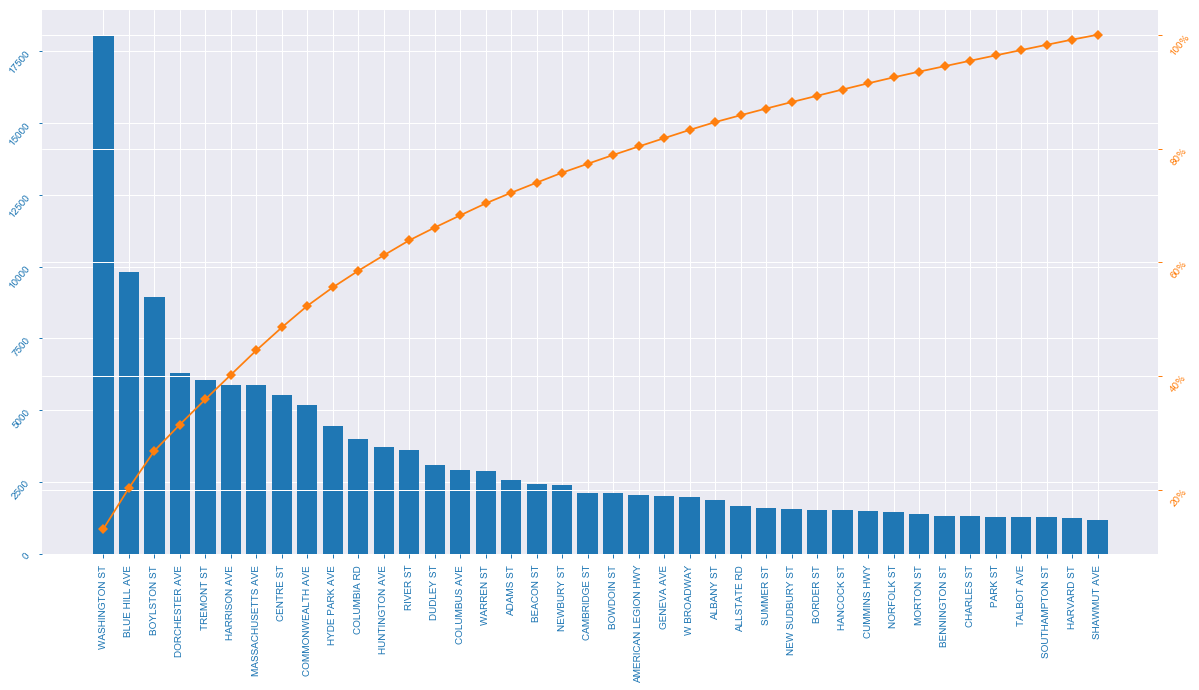

In [123]:
impfunctions.function1(CSV_Data_Pandas_df)

In [124]:
# Most crimes happens on these streets
streets = Clean_Data_Pandas_df.groupby([Clean_Data_Pandas_df['STREET']])['INCIDENT_NUMBER'].aggregate(np.size).reset_index().sort_values('INCIDENT_NUMBER',ascending = False)
streets.rename({'INCIDENT_NUMBER': 'INCIDENT_COUNT'}, axis=1, inplace=True)
streets.head()

,STREET,INCIDENT_COUNT
3700,WASHINGTON ST,17548
386,BLUE HILL AVE,8824
437,BOYLSTON ST,8551
1077,DORCHESTER AVE,6094
3521,TREMONT ST,5864


#### 3.2 Pareto Chart (Crime distribution vs Offense Description)

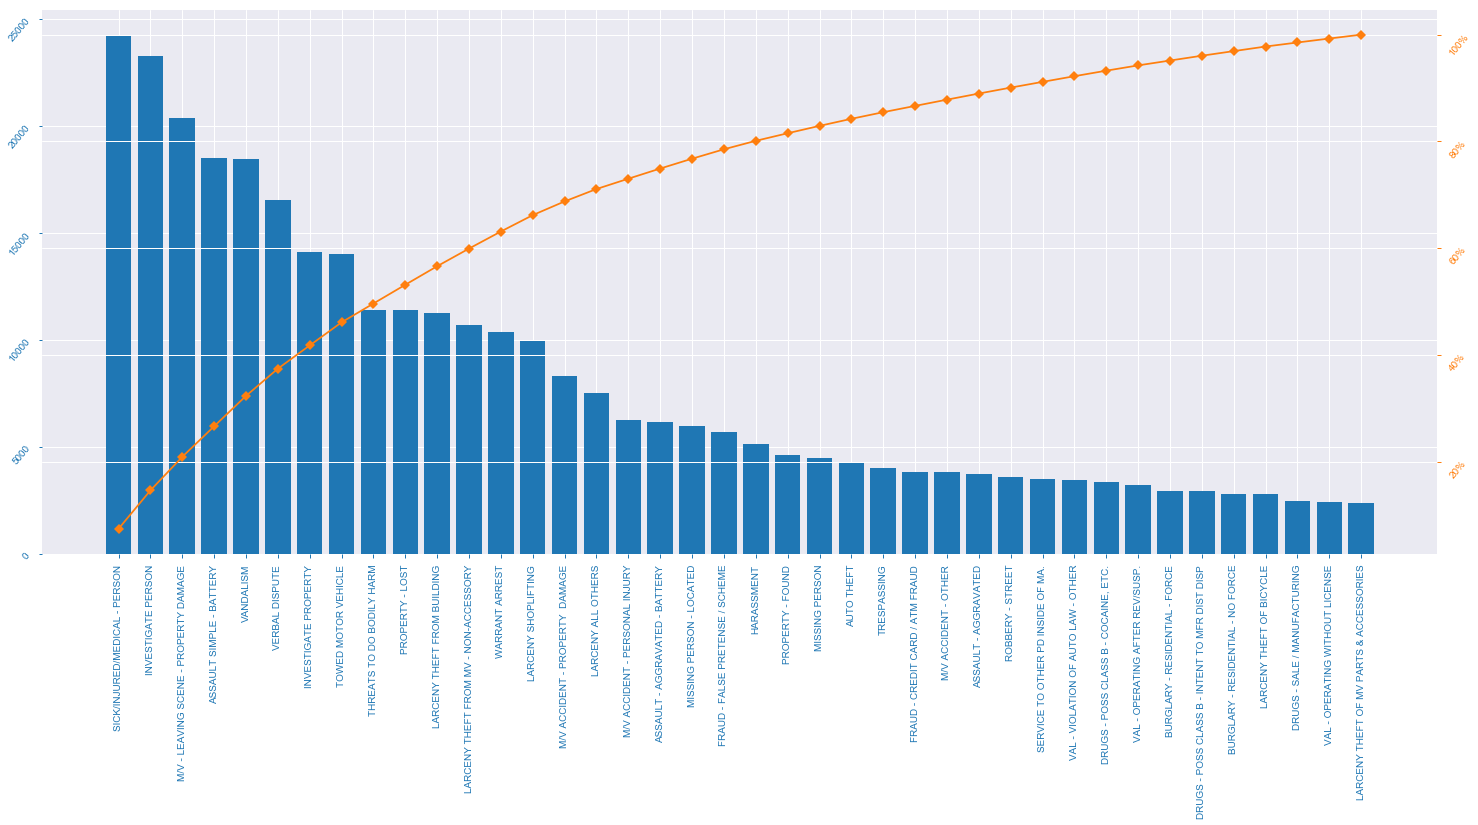

In [125]:
impfunctions.function2(CSV_Data_Pandas_df)

In [126]:
OFFENSE_DESCRIPTION = Clean_Data_Pandas_df.groupby([Clean_Data_Pandas_df['OFFENSE_DESCRIPTION']])['INCIDENT_NUMBER'].aggregate(np.size).reset_index().sort_values('INCIDENT_NUMBER',ascending = False).head(40)
OFFENSE_DESCRIPTION.rename({'INCIDENT_NUMBER': 'INCIDENT_COUNT'}, axis=1, inplace=True)
OFFENSE_DESCRIPTION.head()


,OFFENSE_DESCRIPTION,INCIDENT_COUNT
207,SICK/INJURED/MEDICAL - PERSON,23002
118,INVESTIGATE PERSON,22277
149,M/V - LEAVING SCENE - PROPERTY DAMAGE,17856
222,VANDALISM,17748
20,ASSAULT SIMPLE - BATTERY,17364


#### 3.3 Pareto Chart (Crime distribution vs Offense type)

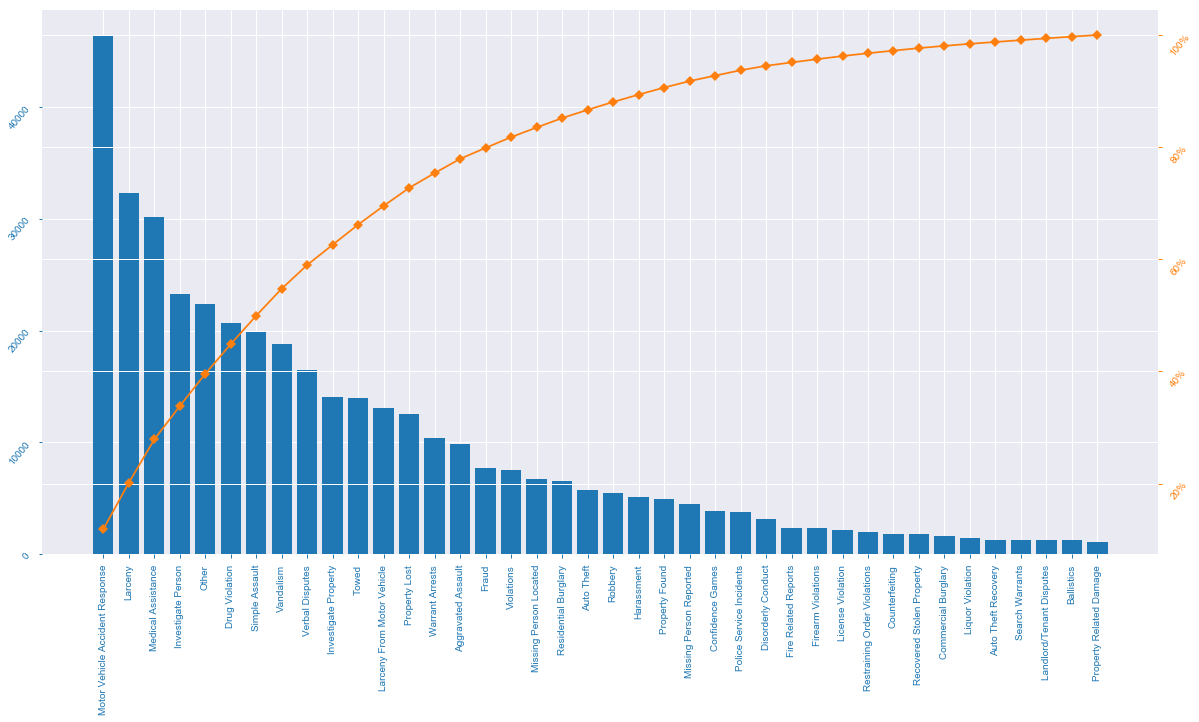

In [127]:
impfunctions.function3(CSV_Data_Pandas_df)

In [128]:
OFFENSE_CODE_GROUP = Clean_Data_Pandas_df.groupby([Clean_Data_Pandas_df['OFFENSE_CODE_GROUP']])['INCIDENT_NUMBER'].aggregate(np.size).reset_index().sort_values('INCIDENT_NUMBER',ascending = False).head(40)
OFFENSE_CODE_GROUP.rename({'INCIDENT_NUMBER': 'INCIDENT_COUNT'}, axis=1, inplace=True)
OFFENSE_CODE_GROUP.head()

,OFFENSE_CODE_GROUP,INCIDENT_COUNT
39,Motor Vehicle Accident Response,37840
30,Larceny,31239
36,Medical Assistance,28705
27,Investigate Person,22277
42,Other,21055


### 3.4 Pareto Chart (Crime distribution across the districts)

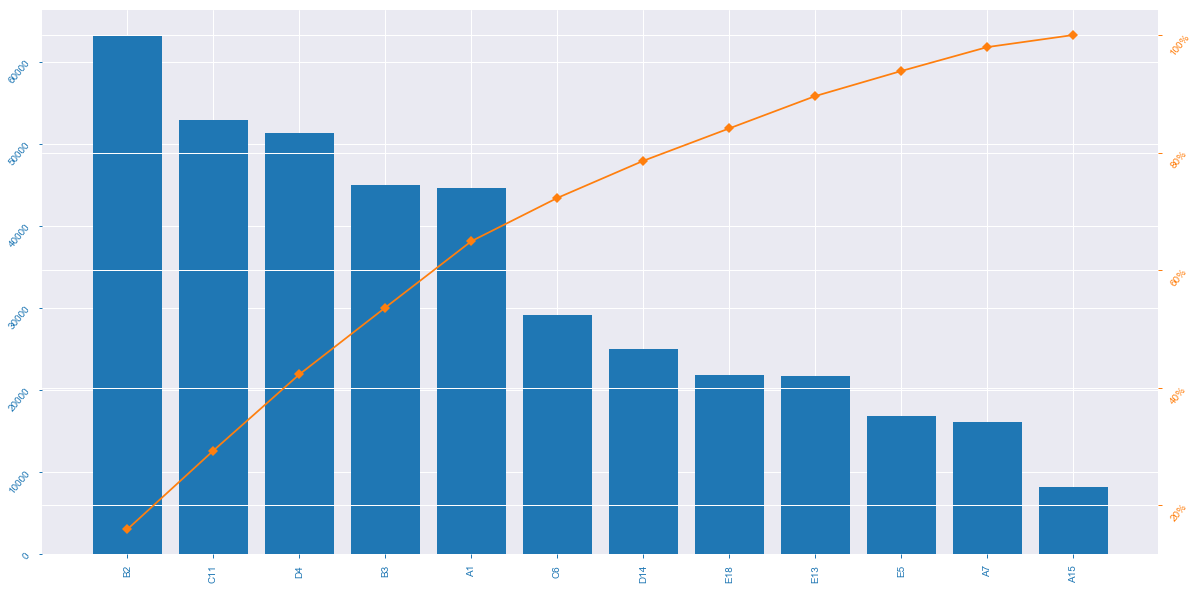

In [129]:
impfunctions.function4(CSV_Data_Pandas_df)

In [130]:
DISTRICT = Clean_Data_Pandas_df.groupby([Clean_Data_Pandas_df['DISTRICT']])['INCIDENT_NUMBER'].aggregate(np.size).reset_index().sort_values('INCIDENT_NUMBER',ascending = False).head(40)
DISTRICT.rename({'INCIDENT_NUMBER': 'INCIDENT_COUNT'}, axis=1, inplace=True)
DISTRICT.head()

,DISTRICT,INCIDENT_COUNT
3,B2,58355
5,C11,50647
8,D4,46686
4,B3,42734
0,A1,39713


### 3.5 Line/Bar Plot Cime Distribution across the districts (Year 2015-2019)

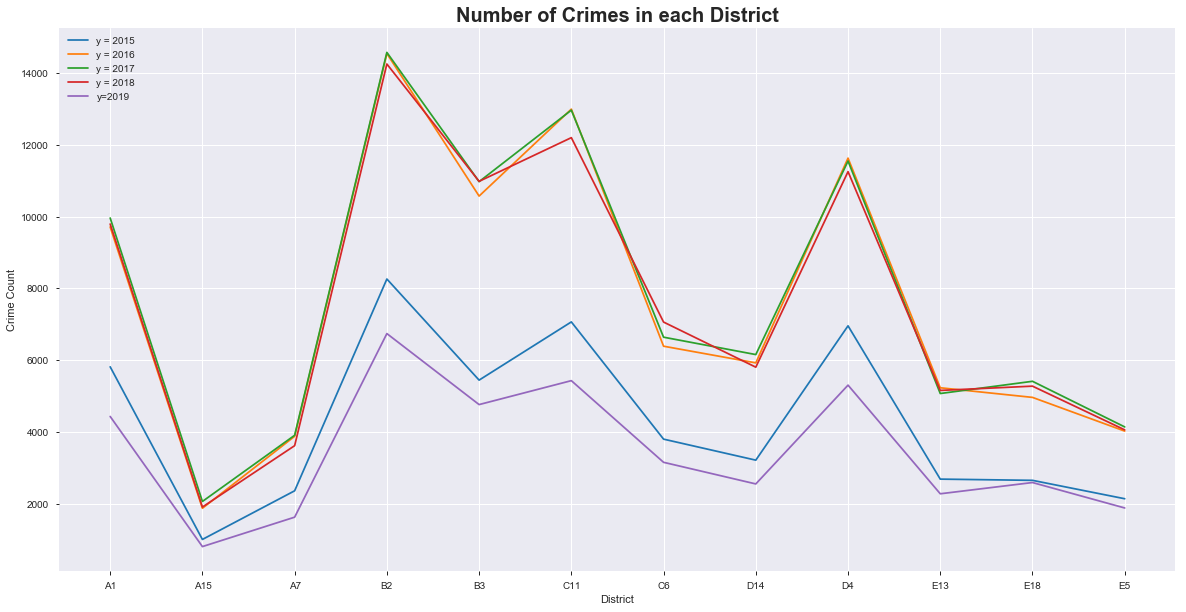

In [131]:
## Line plot
plt.figure(figsize=(20,10))
plt.plot(df_2015['DISTRICT'], df_2015['count'])
plt.plot(df_2016['DISTRICT'], df_2016['count'])
plt.plot(df_2017['DISTRICT'], df_2017['count'])
plt.plot(df_2018['DISTRICT'], df_2018['count'])
plt.plot(df_2019['DISTRICT'], df_2019['count'])

plt.title("Number of Crimes in each District", fontsize=20, fontweight='bold')
plt.xlabel("District")
plt.ylabel("Crime Count")
plt.legend(['y = 2015', 'y = 2016', 'y = 2017', 'y = 2018','y=2019'], loc='upper left')
plt.show()

#### 3.6 Bar/Pie chart Distribution of Crime Years/Day of Week

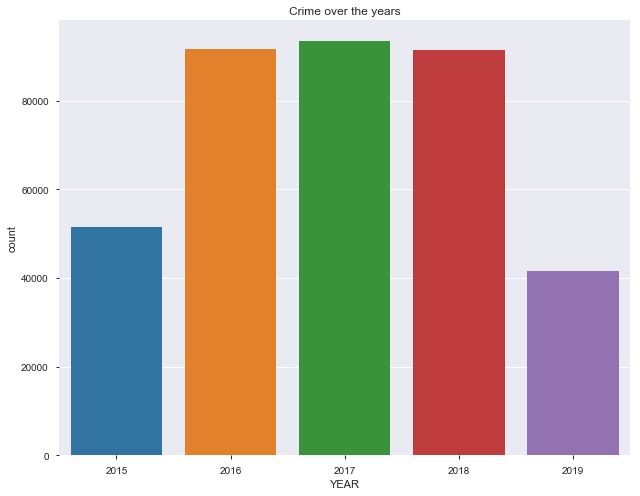

In [132]:
#Bar chart for Crime over the years
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)
sns.countplot(x="YEAR", data=Clean_Data_Pandas_df)
ax.set_title("Crime over the years")
plt.tight_layout()
plt.show()

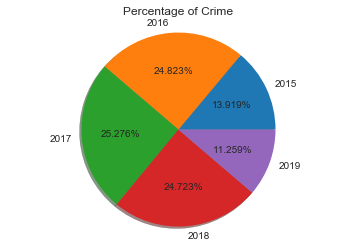

In [133]:
# Percentage of Crime for differnt years
Year_Labels = Clean_Data_Pandas_df['YEAR'].astype('category').cat.categories.tolist()
Crime_Count = Clean_Data_Pandas_df['YEAR'].value_counts()
temp = [Crime_Count[year] for year in Year_Labels]
fig1, ax1 = plt.subplots()
ax1.pie(temp, labels=Year_Labels,  autopct='%1.3f%%',shadow=True) 
ax1.axis('equal')
ax1.set_title("Percentage of Crime")
plt.show()

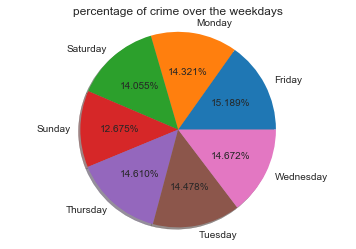

In [134]:
# percentage of crime over the weekdays
Crime_Count = Clean_Data_Pandas_df['DAY_OF_WEEK'].value_counts()
Weekname = Clean_Data_Pandas_df['DAY_OF_WEEK'].astype('category').cat.categories.tolist()
temp = [Crime_Count[dayofweek] for dayofweek in Weekname]
fig1, ax1 = plt.subplots()
ax1.pie(temp, labels=Weekname,  autopct='%1.3f%%',shadow=True) 
ax1.axis('equal')
ax1.set_title("percentage of crime over the weekdays")
plt.show()

#### 3.7 Crime Distribution over the months

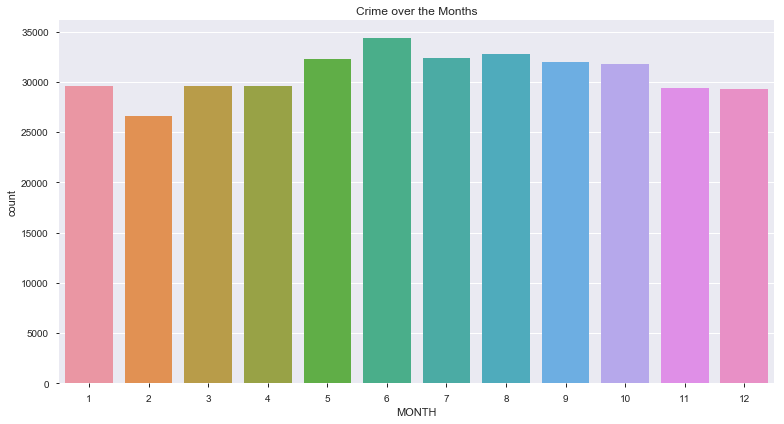

In [135]:
#Bar chart for Crime over the Months
fig = plt.figure(figsize=(11,6))
ax = fig.add_subplot(111)
sns.countplot(x="MONTH", data=Clean_Data_Pandas_df)
ax.set_title("Crime over the Months")
plt.tight_layout()
plt.show()

#### 3.8 Crime Distribution in a day

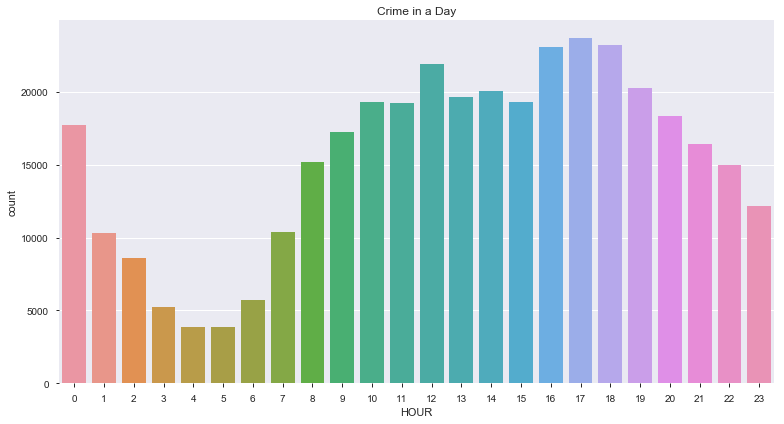

In [136]:
#Bar chart for Crime in day
fig = plt.figure(figsize=(11,6))
ax = fig.add_subplot(111)
sns.countplot(x="HOUR", data=Clean_Data_Pandas_df)
ax.set_title("Crime in a Day")
plt.tight_layout()
plt.show()

#### 3.9 Crime Distribution over the seasons

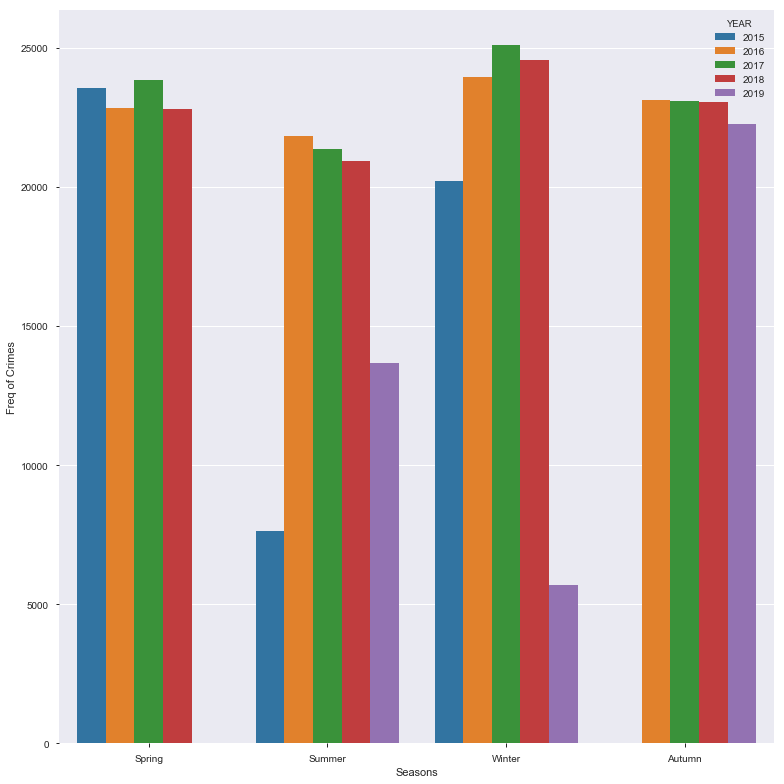

In [137]:
Clean_Data_Pandas_df["SEASON"] = Clean_Data_Pandas_df["MONTH"].apply(lambda x: impfunctions.season_Converter_function(x))
# Crime trend over the different seasons
tempdatafrmae = Clean_Data_Pandas_df.groupby(["YEAR","SEASON"])["OFFENSE_CODE"].count().reset_index()
fig = plt.figure(figsize=(11,11))
p = sns.barplot(x="SEASON", y="OFFENSE_CODE", hue="YEAR", data=tempdatafrmae)
p.set_ylabel("Freq of Crimes")
p.set_xlabel("Seasons")
plt.tight_layout()
plt.show()


#### 3.10 Shooting accross the District

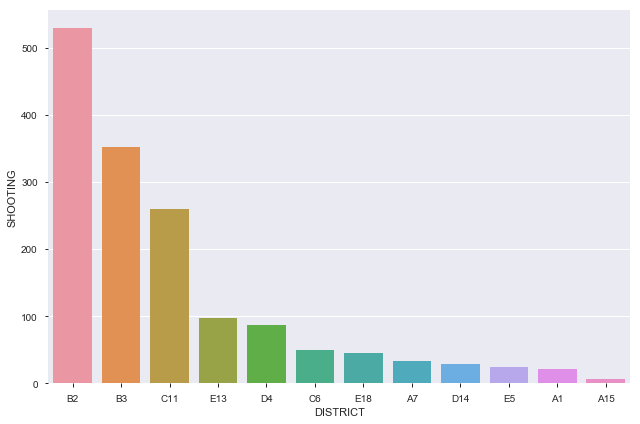

In [138]:
#District vs Count of Shooting
shootingFilterData = Clean_Data_Pandas_df[Clean_Data_Pandas_df["SHOOTING"] == "Y"]
Shooting_GroupBy_data=shootingFilterData.groupby("DISTRICT").agg("SHOOTING").count()
Shooting_Sort_Data=Shooting_GroupBy_data.reset_index().sort_values("SHOOTING", ascending=False)
fig = plt.figure(figsize=(9,6))
#ax = fig.add_subplot(111)
sns.barplot(x=Shooting_Sort_Data.DISTRICT, y=Shooting_Sort_Data.SHOOTING, data=Shooting_Sort_Data)
plt.tight_layout()
plt.show()

#### 3.11 Shooting over the Years

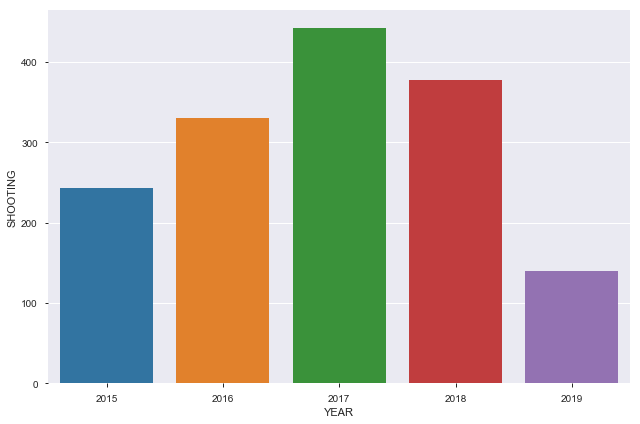

In [139]:
#Year vs Count of Shooting
shootingFilterData = Clean_Data_Pandas_df[Clean_Data_Pandas_df["SHOOTING"] == "Y"]
Shooting_GroupBy_data=shootingFilterData.groupby("YEAR").agg("SHOOTING").count()
Shooting_Sort_Data=Shooting_GroupBy_data.reset_index().sort_values("SHOOTING", ascending=False)
fig = plt.figure(figsize=(9,6))
#ax = fig.add_subplot(111)
sns.barplot(x=Shooting_Sort_Data.YEAR, y=Shooting_Sort_Data.SHOOTING, data=Shooting_Sort_Data)
plt.tight_layout()
plt.show()

#### 3.12 Shooting Distribution in different Months

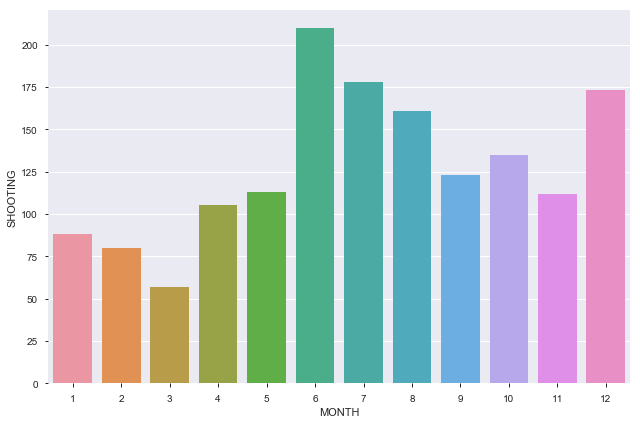

In [140]:
#Month vs Count of Shooting
shootingFilterData = Clean_Data_Pandas_df[Clean_Data_Pandas_df["SHOOTING"] == "Y"]
Shooting_GroupBy_data=shootingFilterData.groupby("MONTH").agg("SHOOTING").count()
Shooting_Sort_Data=Shooting_GroupBy_data.reset_index().sort_values("SHOOTING", ascending=False)
fig = plt.figure(figsize=(9,6))
#ax = fig.add_subplot(111)
sns.barplot(x=Shooting_Sort_Data.MONTH, y=Shooting_Sort_Data.SHOOTING, data=Shooting_Sort_Data)
plt.tight_layout()
plt.show()

#### 3.13 Shooting Distribution for Day of Week

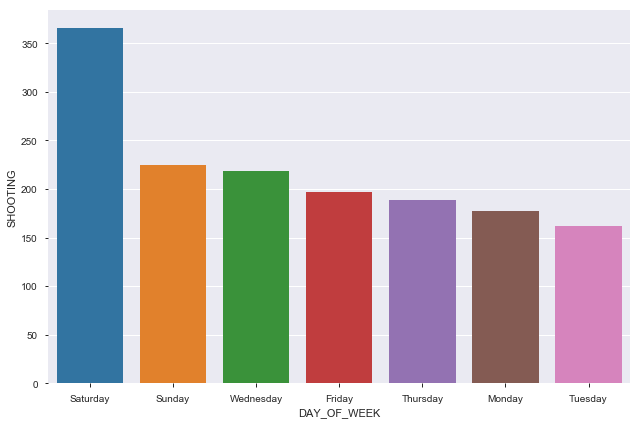

In [141]:
#Day of Week vs Count of Shooting
shootingFilterData = Clean_Data_Pandas_df[Clean_Data_Pandas_df["SHOOTING"] == "Y"]
Shooting_GroupBy_data=shootingFilterData.groupby("DAY_OF_WEEK").agg("SHOOTING").count()
Shooting_Sort_Data=Shooting_GroupBy_data.reset_index().sort_values("SHOOTING", ascending=False)
fig = plt.figure(figsize=(9,6))
#ax = fig.add_subplot(111)
sns.barplot(x=Shooting_Sort_Data.DAY_OF_WEEK, y=Shooting_Sort_Data.SHOOTING, data=Shooting_Sort_Data)
plt.tight_layout()
plt.show()

#### 3.14 Shooting Distribution in a day

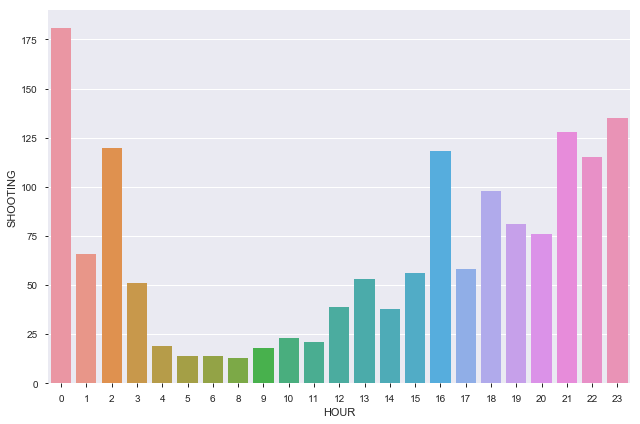

In [142]:
#HOUR vs Count of Shooting
shootingFilterData = Clean_Data_Pandas_df[Clean_Data_Pandas_df["SHOOTING"] == "Y"]
Shooting_GroupBy_data=shootingFilterData.groupby("HOUR").agg("SHOOTING").count()
Shooting_Sort_Data=Shooting_GroupBy_data.reset_index().sort_values("SHOOTING", ascending=False)
fig = plt.figure(figsize=(9,6))
#ax = fig.add_subplot(111)
sns.barplot(x=Shooting_Sort_Data.HOUR, y=Shooting_Sort_Data.SHOOTING, data=Shooting_Sort_Data)
plt.tight_layout()
plt.show()

### 4. Descriptive Statistics

In [143]:
Clean_Data_Pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369585 entries, 0 to 397878
Data columns (total 18 columns):
INCIDENT_NUMBER        369585 non-null object
OFFENSE_CODE           369585 non-null int64
OFFENSE_CODE_GROUP     369585 non-null object
OFFENSE_DESCRIPTION    369585 non-null object
DISTRICT               369585 non-null object
REPORTING_AREA         369585 non-null object
SHOOTING               369585 non-null object
OCCURRED_ON_DATE       369585 non-null object
YEAR                   369585 non-null int64
MONTH                  369585 non-null int64
DAY_OF_WEEK            369585 non-null object
HOUR                   369585 non-null int64
UCR_PART               369585 non-null object
STREET                 369585 non-null object
Lat                    369585 non-null float64
Long                   369585 non-null float64
Location               369585 non-null object
SEASON                 369585 non-null object
dtypes: float64(2), int64(4), object(12)
memory usage: 63.6+ MB

In [144]:
## Check the data Statistics for each variable in the dataset
pandas_profiling.ProfileReport(Clean_Data_Pandas_df)

### 4.1.How is the Boston Crime trend over the years?
     Answer:- Reference "3.6 Bar/Pie chart Distribution of Crime Years/Day of Week"
     From the graph it can be seen that for year 2015 and 2019 we do not have full data, So we can include these years for the analysis. 
     
#### 4.1.a. Is it increasing/decreasing over the years?
        Answer:- It is almost flat graph, there is not drastic change in number of crime in the boston over the years.
        
#### 4.1.b. By what percent it is increasing/decreasing over the years?
        Answer check answer below
        
#### 4.1.c. Which streets/area is contributing more in the crime?
         
        Answer check answer below the descriptive Statistics. According to pareto chart showin in "3.1 Pareto Chart (Crime distribution accross the streets)" it is seen that 20% streets are causing 80% crime in the boston.
        
#### 4.1.d. What are major crimes happening in the Boston City?
        Answer check answer below
#### 4.1.e. What is crime trend accross the Districts?
        Answer check answer below, Reference "3.5 Line/Bar Plot Cime Distribution across the districts (Year 2015-2019)" From the graph it can be seen that District B2 and C11 contributing more crime in the Boston.

In [145]:
# Answer 4.1.b By what percent it is increasing/decreasing over the years?
Year_Labels = Clean_Data_Pandas_df['YEAR'].astype('category').cat.categories.tolist()
Crime_Count = Clean_Data_Pandas_df['YEAR'].value_counts()
Crime_Count*100/sum(Crime_Count) 

2017    25.276459
2016    24.822977
2018    24.722594
2015    13.919396
2019    11.258574
Name: YEAR, dtype: float64

In [146]:
# Answer 4.2.c Most crimes happens on these streets
streets = Clean_Data_Pandas_df.groupby([Clean_Data_Pandas_df['STREET']])['INCIDENT_NUMBER'].aggregate(np.size).reset_index().sort_values('INCIDENT_NUMBER',ascending = False)
streets.rename({'INCIDENT_NUMBER': 'INCIDENT_COUNT'}, axis=1, inplace=True)
streets.head()

,STREET,INCIDENT_COUNT
3700,WASHINGTON ST,17548
386,BLUE HILL AVE,8824
437,BOYLSTON ST,8551
1077,DORCHESTER AVE,6094
3521,TREMONT ST,5864


In [147]:
# Answer 4.2.d What are major crimes happening in the Boston City?
OFFENSE_CODE_GROUP = Clean_Data_Pandas_df.groupby([Clean_Data_Pandas_df['OFFENSE_CODE_GROUP']])['INCIDENT_NUMBER'].aggregate(np.size).reset_index().sort_values('INCIDENT_NUMBER',ascending = False).head(40)
OFFENSE_CODE_GROUP.rename({'INCIDENT_NUMBER': 'INCIDENT_COUNT'}, axis=1, inplace=True)
OFFENSE_CODE_GROUP.head()

,OFFENSE_CODE_GROUP,INCIDENT_COUNT
39,Motor Vehicle Accident Response,37840
30,Larceny,31239
36,Medical Assistance,28705
27,Investigate Person,22277
42,Other,21055


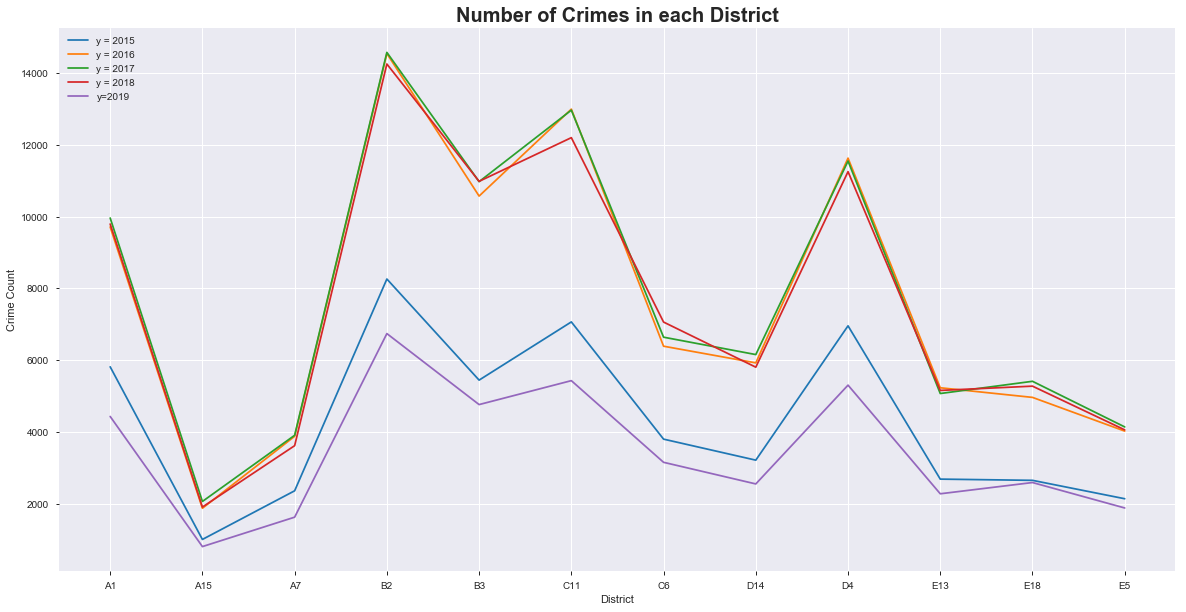

In [148]:
# Answer 4.1.e. What is crime trend accross the Districts?
### Reference 3.5 Line/Bar Plot Cime Distribution across the districts (Year 2015-2019)
## Line plot
plt.figure(figsize=(20,10))
plt.plot(df_2015['DISTRICT'], df_2015['count'])
plt.plot(df_2016['DISTRICT'], df_2016['count'])
plt.plot(df_2017['DISTRICT'], df_2017['count'])
plt.plot(df_2018['DISTRICT'], df_2018['count'])
plt.plot(df_2019['DISTRICT'], df_2019['count'])

plt.title("Number of Crimes in each District", fontsize=20, fontweight='bold')
plt.xlabel("District")
plt.ylabel("Crime Count")
plt.legend(['y = 2015', 'y = 2016', 'y = 2017', 'y = 2018','y=2019'], loc='upper left')
plt.show()

In [149]:
DISTRICT = Clean_Data_Pandas_df.groupby([Clean_Data_Pandas_df['DISTRICT']])['INCIDENT_NUMBER'].aggregate(np.size).reset_index().sort_values('INCIDENT_NUMBER',ascending = False).head(40)
DISTRICT.rename({'INCIDENT_NUMBER': 'INCIDENT_COUNT'}, axis=1, inplace=True)
DISTRICT.head()

,DISTRICT,INCIDENT_COUNT
3,B2,58355
5,C11,50647
8,D4,46686
4,B3,42734
0,A1,39713


### Answers for 4.2. What are the Crime trend over the weekdays/Weekends?
    a. Is there any day where people are more safe?
    Answer :- Sunday is more safe for people as compare to other weekdays, it can be seen that For sunday the crime count is below 50,000.  
    b. What is safest time for Boston People?
    Answer: Morning hours from 1 am to 7 am, is the time where crimes freq is very less, so people would be more safe around this time 4am-11am

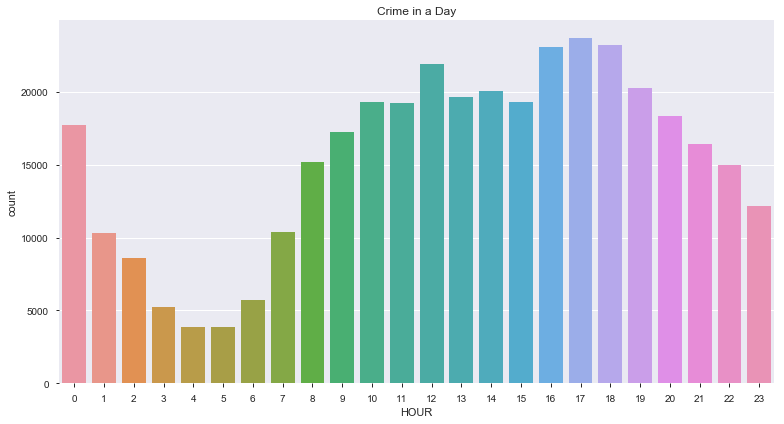

In [150]:
#Bar chart for Crime in day
fig = plt.figure(figsize=(11,6))
ax = fig.add_subplot(111)
sns.countplot(x="HOUR", data=Clean_Data_Pandas_df)
ax.set_title("Crime in a Day")
plt.tight_layout()
plt.show()

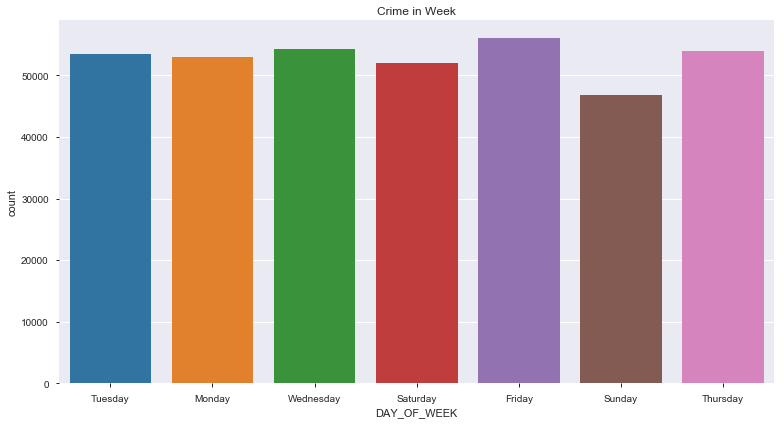

In [151]:
#Bar chart for Crime in day
fig = plt.figure(figsize=(11,6))
ax = fig.add_subplot(111)
sns.countplot(x="DAY_OF_WEEK", data=Clean_Data_Pandas_df)
ax.set_title("Crime in Week")
plt.tight_layout()
plt.show()

### Answers for 4.3. What are the Crime trend in differnt seasons?
Reference: "3.9 Crime Distribution over the seasons" it can be seen from the graph that spring and fall has the flat trend, But In Winter more crime is happening in Boston.

    a. Do the Crime happens more in Summer or less in Winter?
    Answer 
    In Winters crime is more,
    In summer Crime is low
    
    
    b. What are the possible reasons for differences in the number of crimes in winter and summer?
    Answer
    In Winters crime is more,
    It might be because of long nights, 
    Short days
    streets are less populated
    people are covered so easy to disguise
    people are covered so they can hide the Weapons
    Difficult to catch as unfavorable weather conditions
    Visual range is reduced 
    
    In summer Crime is low
    People are more active in the street,
    more day light
    most populated streets
    lesser and light clothes, difficult to hide weapons
    late sunset

In [152]:
Clean_Data_Pandas_df["SEASON"] = Clean_Data_Pandas_df["MONTH"].apply(lambda x: impfunctions.season_Converter_function(x))
# Crime trend over the different seasons
tempdatafrmae = Clean_Data_Pandas_df.groupby(["YEAR","SEASON"])["OFFENSE_CODE"].count().reset_index()
tempdatafrmae

,YEAR,SEASON,OFFENSE_CODE
0,2015,Spring,23569
1,2015,Summer,7642
2,2015,Winter,20233
3,2016,Autumn,23133
4,2016,Spring,22845
5,2016,Summer,21821
6,2016,Winter,23943
7,2017,Autumn,23097
8,2017,Spring,23839
9,2017,Summer,21365


### 4.4 How is the Shooting trend in Boston over the years?
Answer there is drastic increase in the year 2017, which is not good for the health of Boston People.

    a. Is it increasing/decreasing over the years?
    In the recent year 2018 shooting decreased by 14%, which is very great achivement by Boston Police.
    
    b. What is the shooting trend over a day?
         please see below for the Descriptive statistics
    c. What is the Shooting trend over the Months.
        please see below for the Descriptive statistics
    d. What is the Shooting trend accross the Districts? 
         please see below for the Descriptive statistics

In [153]:
# Answer 4.4 a How is the Shooting trend in Boston over the years?
## a. Is it increasing/decreasing over the years?
shootingFilterData = Clean_Data_Pandas_df[Clean_Data_Pandas_df["SHOOTING"] == "Y"]
Shooting_GroupBy_data=shootingFilterData.groupby("YEAR").agg("SHOOTING").count()
Shooting_Sort_Data=Shooting_GroupBy_data.reset_index().sort_values("SHOOTING", ascending=False)
Shooting_Sort_Data 

,YEAR,SHOOTING
2,2017,443
3,2018,378
1,2016,331
0,2015,243
4,2019,140


In [154]:
# Answer 4.4 b What is the shooting trend over a day?
## From 4 am to 11 am there are less shooting, that means this is the safest time for Boston People
shootingFilterData = Clean_Data_Pandas_df[Clean_Data_Pandas_df["SHOOTING"] == "Y"]
Shooting_GroupBy_data=shootingFilterData.groupby("HOUR").agg("SHOOTING").count()
Shooting_Sort_Data=Shooting_GroupBy_data.reset_index().sort_values("SHOOTING", ascending=False)
Shooting_Sort_Data

,HOUR,SHOOTING
0,0,181
22,23,135
20,21,128
2,2,120
15,16,118
21,22,115
17,18,98
18,19,81
19,20,76
1,1,66


In [155]:
# Answer 4.4 c. What is the Shooting trend over the Months.
# Jan, Feb, and march have less shooting incidents.
shootingFilterData = Clean_Data_Pandas_df[Clean_Data_Pandas_df["SHOOTING"] == "Y"]
Shooting_GroupBy_data=shootingFilterData.groupby("MONTH").agg("SHOOTING").count()
Shooting_Sort_Data=Shooting_GroupBy_data.reset_index().sort_values("SHOOTING", ascending=False)
Shooting_Sort_Data

,MONTH,SHOOTING
5,6,210
6,7,178
11,12,173
7,8,161
9,10,135
8,9,123
4,5,113
10,11,112
3,4,105
0,1,88


In [156]:
# Answer 4.4 d. What is the Shooting trend accross the Districts.
## District B2, B3, and C11 is having more shooting incidents
shootingFilterData = Clean_Data_Pandas_df[Clean_Data_Pandas_df["SHOOTING"] == "Y"]
Shooting_GroupBy_data=shootingFilterData.groupby("DISTRICT").agg("SHOOTING").count()
Shooting_Sort_Data=Shooting_GroupBy_data.reset_index().sort_values("SHOOTING", ascending=False)
Shooting_Sort_Data

,DISTRICT,SHOOTING
3,B2,530
4,B3,352
5,C11,260
9,E13,98
8,D4,87
6,C6,49
10,E18,45
2,A7,33
7,D14,29
11,E5,24


### 4.5. Can we do time series analysis on the available dataset?
    Yes we can do the time series analysis
    a. if yes, What are the methods we can apply.
    we can apply Simple Average, Moving Average etc. 
    b. Does applied methods can be used for predictive analytics?
    yes
    c. How to measure the accuracy of Model ?
    Using Rmse
    
    The answer of this section would be explained in the section 5
    "5. Modeling and predictive analystics"
    

### 5. Modeling and predictive analystics
#### 5.1 Data Preparation

In [157]:
shootingFilterData = Clean_Data_Pandas_df[Clean_Data_Pandas_df["SHOOTING"] == "Y"]
Shooting_GroupBy_data=shootingFilterData.groupby("OCCURRED_ON_DATE").agg("SHOOTING").count()
Shooting_Sort_Data=Shooting_GroupBy_data.reset_index().sort_values("SHOOTING", ascending=False)
dataframe = Shooting_Sort_Data

#### 5.2 Test and Train Data

In [158]:
count=round(Shooting_GroupBy_data.count()*.8,0)

trainData=dataframe[0:int(count)] 
testData=dataframe[int(count):]

dataframe.Timestamp = pd.to_datetime(dataframe.OCCURRED_ON_DATE,format='%Y-%m-%d %H:%M') 
dataframe.index = dataframe.Timestamp 

trainData.Timestamp = pd.to_datetime(trainData.OCCURRED_ON_DATE,format='%Y-%m-%d %H:%M') 
trainData.index = trainData.Timestamp 

testData.Timestamp = pd.to_datetime(testData.OCCURRED_ON_DATE,format='%Y-%m-%d %H:%M') 
testData.index = testData.Timestamp 

#### 5.3 Time Series Analysis Plots

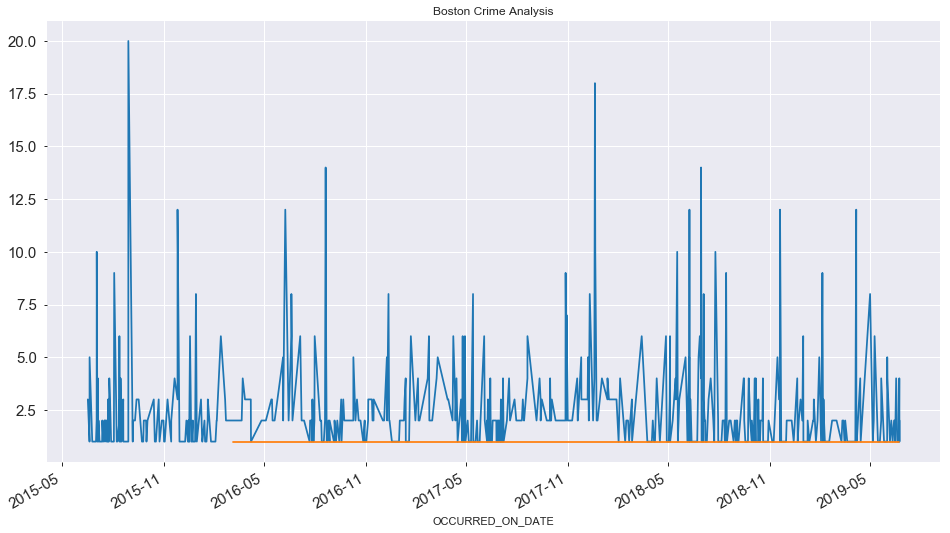

In [159]:
trainData.SHOOTING.plot(figsize=(16,9), title= 'Boston Crime Analysis', fontsize=15)
testData.SHOOTING.plot(figsize=(16,9), title= 'Boston Crime Analysis', fontsize=15)
plt.show()


#### 5.4 Time Series Analysis Simple Average

In [160]:
##Time Series Analysis for Shooting 
##Method 1: – Simple Average
Tcpavg = testData.copy()
Tcpavg['avg_forecast'] = trainData['SHOOTING'].mean()
rms = sqrt(mean_squared_error(testData.SHOOTING, Tcpavg.avg_forecast))
print(rms)

1.3924268502581754


#### 5.5 Time Series Analysis Moving Average

In [161]:
##Time Series Analysis for Shooting 
#Method 2 – Moving Average
Tcpavg = testData.copy()
Tcpavg['moving_avg_forecast'] = trainData['SHOOTING'].rolling(12).mean().iloc[-1]
rms = sqrt(mean_squared_error(testData.SHOOTING, Tcpavg.moving_avg_forecast))
print(rms)

0.0


## 6. Future Scope/Research Area
    1. What is area on Geograpic map, which have more Crimes or Shooting
    Research has shown below, it can be implemented on Google maps.

In [162]:
shootingFilterData = Clean_Data_Pandas_df[Clean_Data_Pandas_df["SHOOTING"] == "Y"]
Shooting_GroupBy_data=shootingFilterData.groupby("OCCURRED_ON_DATE").agg("SHOOTING").count()
Shooting_Sort_Data=Shooting_GroupBy_data.reset_index().sort_values("SHOOTING", ascending=False)
dataframe = Shooting_Sort_Data
dataframe.head()

,OCCURRED_ON_DATE,SHOOTING
58,2015-08-29 02:42:00,20
493,2017-12-20 02:15:00,18
216,2016-08-20 00:05:00,14
562,2018-06-30 00:41:00,14
649,2018-11-19 21:33:00,12


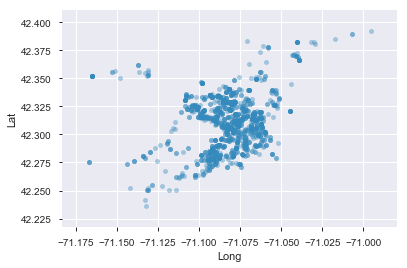

In [163]:
shootingFilterData.plot(kind="scatter", x="Long", y="Lat", alpha=0.4)
plt.show()

In [164]:
shootingFilterData = Clean_Data_Pandas_df[Clean_Data_Pandas_df["SHOOTING"] == "Y"]
Shooting_GroupBy_data=shootingFilterData.groupby(['Long','Lat']).agg("SHOOTING").count()
Shooting_Sort_Data=Shooting_GroupBy_data.reset_index().sort_values("SHOOTING", ascending=False)
dataframe = Shooting_Sort_Data
location_shoot = dataframe.loc[(Shooting_Sort_Data['Lat']>41) & (Shooting_Sort_Data['Long'] < -68)]  
dataframe.head()

,Long,Lat,SHOOTING
327,-71.078719,42.311955,21
136,-71.093168,42.335062,18
280,-71.081742,42.340604,18
1,-71.165100,42.351987,14
474,-71.067083,42.318148,14


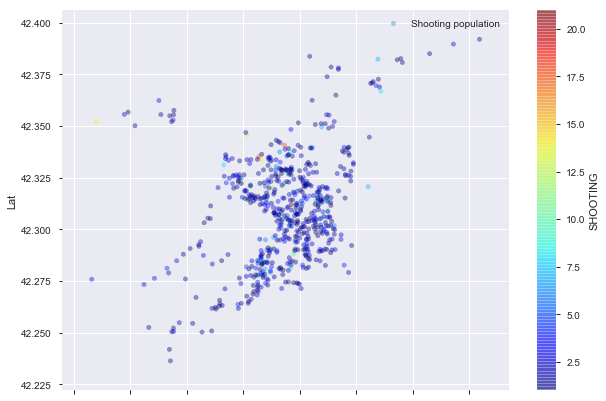

In [165]:
location_shoot.plot(kind="scatter", x="Long", y="Lat", label="Shooting population",
    c="SHOOTING", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show()
